In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
%matplotlib inline
import os

In [10]:
project_path = os.path.abspath(os.path.join(os.getcwd(),os.pardir))
raw_data_path = os.path.join(project_path,'Data\\Raw_Data')
train_data_path = os.path.join(raw_data_path,'train.csv')
test_data_path = os.path.join(raw_data_path,'test.csv')

In [11]:
raw_data_train = pd.read_csv(train_data_path)
raw_data_test = pd.read_csv(test_data_path)

train_data = raw_data_train.copy()
test_data = raw_data_test.copy()

# Exploring Source Variables

### shape of data

In [84]:
train_data.shape #891 entries, 12 variables

(891, 12)

### nulls in data

In [88]:
(train_data.isnull().sum()).sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

### uniqueness of data

In [531]:
dic = dict()

for column in train_data.columns:
    column_uniqueness = train_data[column].nunique()/train_data.shape[0]*100
    dic[column] = round(column_uniqueness,2)
pd.Series(dic).sort_values(ascending=False)

Name                100.00
PassengerId         100.00
Ticket               76.43
Fare                 27.83
Cabin                16.50
Age                   9.88
cabin_cat_series      1.01
Parch                 0.79
SibSp                 0.79
Age_Group             0.67
Embarked              0.34
Pclass                0.34
Cabin_Flag            0.22
cabin_unknown         0.22
Sex                   0.22
Survived              0.22
dtype: float64

In [14]:
train_data.describe() #for numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Variables Vs Survival

In [239]:
def colors_list(unique_list):
    length = len(unique_list)
    colors_list = ['orange']
    colors_list.extend(['blue']*(length-1))
    return colors_list

In [466]:
def colors_list_sorted(train_data_copy,var_name,var_unique_list):
    train_data_copy = train_data_copy.set_index(var_name)
    means_index_sorted = pd.DataFrame(train_data_copy.groupby(level=0)['Survived'].mean()).sort_values(by='Survived',ascending=False)
    colors_listed = colors_list(var_unique_list)
    colors_df = pd.DataFrame(index = means_index_sorted.index, data= {'colors': colors_listed})
    colors_df = colors_df.sort_index()
    return list(colors_df.sort_index()['colors'])
    

In [338]:
def variable_mean_survival(var_name):
    train_data_copy = train_data[~train_data[var_name].isna()]
    var_unique_list = sorted(list(train_data_copy[var_name].unique()))     
    #countPerVarValue = train_data_copy.groupby(var_name)['PassengerId'].count()
    countPerVarValue = pd.DataFrame(train_data_copy.groupby(var_name)['PassengerId'].count(),index = var_unique_list)['PassengerId']
    #avg_survival = list(train_data_copy.groupby(var_name)['Survived'].mean())  
    avg_survival = pd.DataFrame(train_data_copy.set_index(var_name).groupby(level=0)['Survived'].mean(),index = var_unique_list)['Survived']

    colors_map = colors_list_sorted(train_data_copy,var_name,var_unique_list)
                                      
    return var_unique_list, countPerVarValue, avg_survival, colors_map

In [244]:
def plt_settings(cur_plt, ititle):
    ax = plt.gca()
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.get_yaxis().set_visible(False)  
    plt.title(ititle)
    for i, rect in enumerate(ax.patches):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,  str(round(height, 2)),
                ha='center', va='bottom')    

## Sex Vs Survival

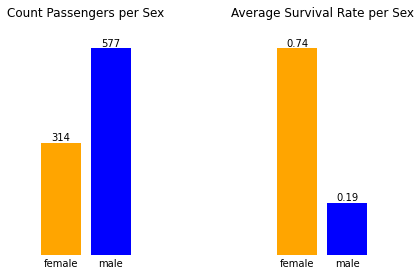

In [467]:
unique_sexes,sex_value_count, avg_survival,colors_map = variable_mean_survival('Sex')

plt.subplot(1, 3, 1)
plt.bar(unique_sexes,sex_value_count,color=colors_map)
plt_settings(plt,'Count Passengers per Sex\n')

plt.subplot(1, 3, 3)
plt.bar(unique_sexes,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate per Sex\n')

## Embarked Vs Survival 

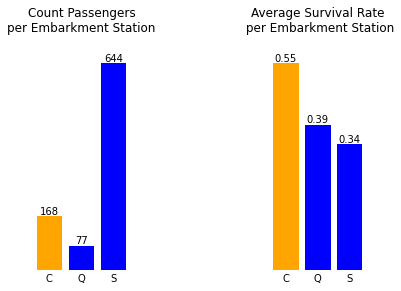

In [462]:
unique_embark,embark_value_count, avg_survival,colors_map = variable_mean_survival('Embarked')

plt.subplot(1, 3, 1)
plt.bar(unique_embark,embark_value_count,color=colors_map)
plt_settings(plt,'Count Passengers\nper Embarkment Station\n')

plt.subplot(1, 3, 3)
plt.bar(unique_embark,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\n per Embarkment Station\n')

## Pclass Vs Survival

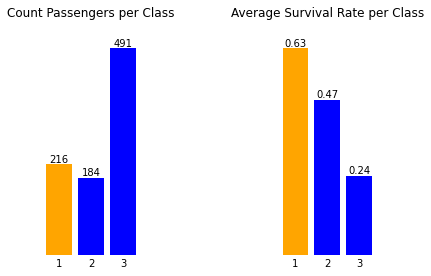

In [463]:
unique_class,class_value_count, avg_survival,colors_map = variable_mean_survival('Pclass')

plt.subplot(1, 3, 1)
plt.bar(unique_class,class_value_count,color=colors_map)
plt_settings(plt,'Count Passengers per Class\n')

plt.subplot(1, 3, 3)
plt.bar(unique_class,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate per Class\n')

## SibSp Vs Survival

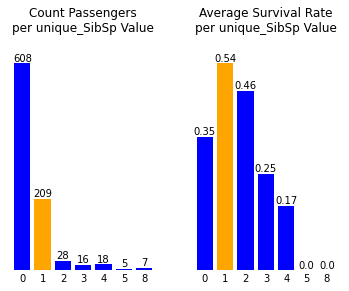

In [468]:
unique_SibSp,SibSp_value_count, avg_survival,colors_map = variable_mean_survival('SibSp')

plt.subplot(1,2,1) 
plt.bar(list(map(str,unique_SibSp)), SibSp_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper unique_SibSp Value\n')

plt.subplot(1, 2, 2)
plt.bar(list(map(str,unique_SibSp)),avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper unique_SibSp Value\n')

## Parch Vs Survival

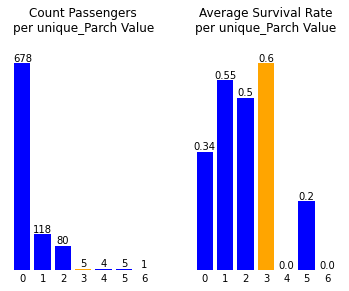

In [469]:
unique_Parch,Parch_value_count, avg_survival,colors_map = variable_mean_survival('Parch')

plt.subplot(1,2,1) 
plt.bar(list(map(str,unique_Parch)), Parch_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper unique_Parch Value\n')

plt.subplot(1, 2, 2)
plt.bar(list(map(str,unique_Parch)),avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper unique_Parch Value\n')

## Age Vs Survival

In [515]:
#sort the ages into age groups #explore more about binning!
bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(train_data.Age, bins, labels = labels)
train_data['Age_Group'] = age_groups
train_data['Age_Group'] = train_data['Age_Group'].astype(str)

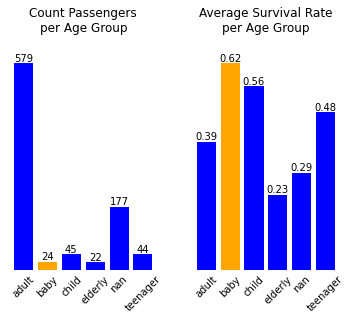

In [516]:
unique_ageGroup,ageGroup_value_count, avg_survival,colors_map = variable_mean_survival('Age_Group')

plt.subplot(1,2,1) 
plt.bar(unique_ageGroup, ageGroup_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper Age Group\n')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(unique_ageGroup,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper Age Group\n')
plt.xticks(rotation=45);

## Cabin Vs Survival

Following the idea that passengers of no cabin stated are of lower classes

In [517]:
train_data['Cabin_Flag'] = train_data["Cabin"].notnull().astype('int')

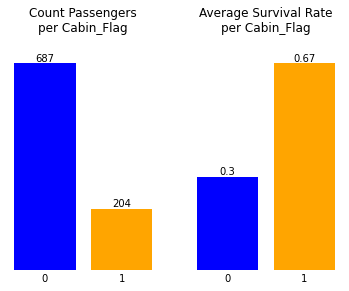

In [522]:
unique_cabinFlag,cabinFlag_value_count, avg_survival,colors_map = variable_mean_survival('Cabin_Flag')

plt.subplot(1,2,1) 
plt.bar(unique_cabinFlag, cabinFlag_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper Cabin_Flag\n')
plt.xticks(ticks=[0,1])

plt.subplot(1, 2, 2)
plt.bar(unique_cabinFlag,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper Cabin_Flag\n')
plt.xticks(ticks=[0,1]);

# fare, ticket, title

## Ticket Vs Survival

In [ ]:
list(titanic_data.Ticket.unique()) #some tickets are numeric and some are alphanumeric

In [ ]:
titanic_data.Ticket.nunique()/titanic_data.Ticket.shape[0]*100
#~71% of tickets are unique, so  may be some tickets have multiple passangers on them

In [ ]:
titanic_data['numeric_Ticket'] = titanic_data['Ticket'].apply(lambda x:1 if x.isnumeric() else 0)

In [ ]:
pd.pivot_table(data=titanic_data, columns='numeric_Ticket', index='Survived', values= 'PassengerId' ,aggfunc='count', margins=True )
#majority of tickets were numeric, majority representation makes it so that majority of survivals had numeric tickets 
#and majority of those whose didn't survive are also holders of numeric tickets

In [ ]:
sns.countplot(data=titanic_data, x='numeric_Ticket')

In [ ]:
sns.countplot(data=titanic_data, x='numeric_Ticket', hue='Survived') # doesn't seem like eother type would inc likelihood of survival

In [ ]:
sns.barplot(data=titanic_data, x='numeric_Ticket', y='Survived')

In [ ]:
sns.countplot(data=titanic_data, x='numeric_Ticket', hue='Pclass')

## Age, class Vs survival

C:\Users\TDInstaller\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


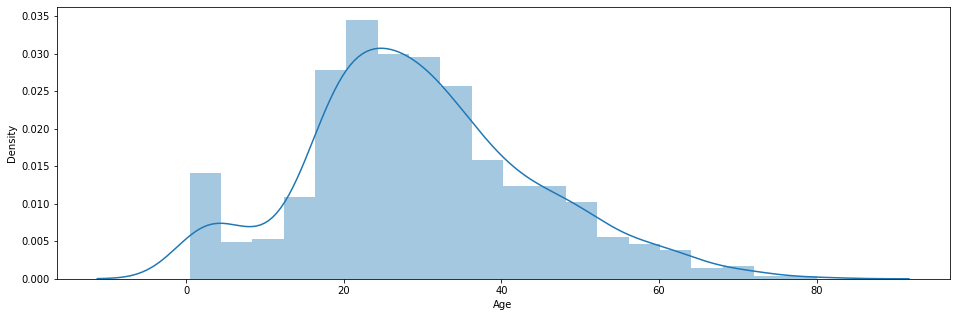

In [258]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
sns.distplot(train_data.Age);

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

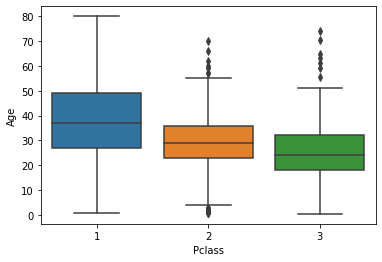

In [259]:
sns.boxplot(data=train_data, x='Pclass', y='Age') #3rd class are the youngest

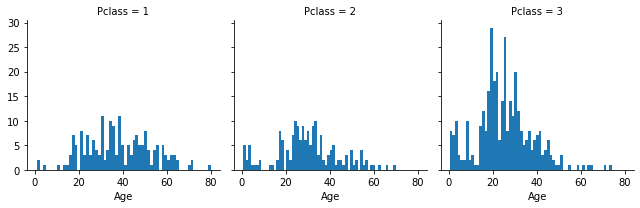

In [260]:
g = sns.FacetGrid(train_data, col='Pclass')
g.map(plt.hist, 'Age', bins=60)

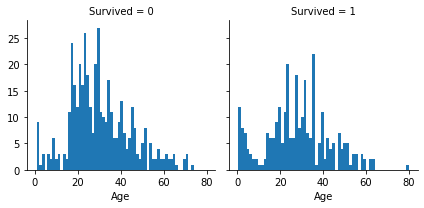

In [261]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=60)

In [3]:
#sort the ages into age groups #explore more about binning!
bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(titanic_data.Age, bins, labels = labels)
titanic_data['Age_Group'] = age_groups

In [ ]:
sns.countplot(data=titanic_data, x='Age_Group',hue='Survived') #babies and children are more likely to survive

In [ ]:
sns.countplot(data=titanic_data, x='Age_Group',hue='Pclass')

In [ ]:
sns.barplot(data=titanic_data,x="Age_Group", y="Survived")

## Fare vs Survival

In [ ]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
sns.distplot(titanic_data.Fare);

In [ ]:
sns.distplot(titanic_data.Fare);

In [ ]:
survived_fares = titanic_data[titanic_data['Survived']==1][['Fare','Survived']]
not_survived_fares = titanic_data[titanic_data['Survived']==0][['Fare','Survived']]

In [ ]:
plt.figure(figsize = (16, 4))
sns.distplot(survived_fares.Fare);
sns.distplot(not_survived_fares.Fare);

In [ ]:
plt.figure(figsize = (16, 4))
sns.distplot(survived_fares.Fare, label='Survived=1');
sns.distplot(not_survived_fares.Fare, label='Survived=0');
plt.legend()

In [ ]:
f, axes = plt.subplots(1,1, figsize = (14, 3))
sns.distplot(survived_fares.Fare).set_title('Fares Dist For Survivors');

In [ ]:
f, axes = plt.subplots(1,1, figsize = (14, 3))
sns.distplot(not_survived_fares.Fare).set_title('Fares Dist For Non-Survivors');

In [ ]:
# Higher fare correlates with higher survival rate
g = sns.FacetGrid(titanic_data, col='Survived')
g.map(plt.hist, 'Fare', bins=30)

# Feature Engineering

In [8]:
titanic_data = titanic_data_copy.copy()

## Age

In [9]:
def get_class_avgAge():
    return titanic_data.groupby('Pclass')['Age'].mean()

def derive_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return get_class_avgAge()[Pclass]
    else:
        return Age

titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(derive_age,axis=1)  

bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(titanic_data.Age, bins, labels = labels)
titanic_data['Age_Group'] = age_groups


## Title, Cabin

In [10]:

titanic_data['passenger_title'] = titanic_data.Name.apply(lambda x: x.split(',',1)[1].split('.')[0].strip()).values

titanic_data['cabin_cat'] = titanic_data.Cabin.apply(lambda x: str(x)[0])
titanic_data['cabin_multiple'] = titanic_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

## Ticket

In [11]:
titanic_data['numeric_ticket'] = titanic_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
titanic_data['Ticket_Frequency'] = titanic_data.groupby('Ticket')['PassengerId'].count()

def get_all_tickets_frequency():
        return titanic_data.groupby('Ticket')['PassengerId'].count()
def get_single_ticket_frequency(cols):
    Ticket = cols[0]
    return get_all_tickets_frequency()[str(Ticket)]   
titanic_data['Ticket_Frequency'] = titanic_data[['Ticket']].apply(get_single_ticket_frequency,axis=1)

## Fare

In [12]:
def get_class_avgFare():
    return titanic_data.groupby('Pclass')['Fare'].mean()
    
def derive_Fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    if pd.isnull(Fare):
        return get_class_avgFare()[Pclass]
    else:
        return Fare   
    
titanic_data['Fare'] = titanic_data[['Fare','Pclass']].apply(derive_Fare,axis=1)    

## Final na handeling and data types handling

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       1309 non-null   int64   
 1   Survived          891 non-null    float64 
 2   Pclass            1309 non-null   int64   
 3   Name              1309 non-null   object  
 4   Sex               1309 non-null   object  
 5   Age               1309 non-null   float64 
 6   SibSp             1309 non-null   int64   
 7   Parch             1309 non-null   int64   
 8   Ticket            1309 non-null   object  
 9   Fare              1309 non-null   float64 
 10  Cabin             295 non-null    object  
 11  Embarked          1307 non-null   object  
 12  Source_File       1309 non-null   object  
 13  Age_Group         1309 non-null   category
 14  passenger_title   1309 non-null   object  
 15  cabin_cat         1309 non-null   object  
 16  cabin_multiple    1309 no

In [23]:
titanic_data.dropna(subset=['Embarked'],inplace = True)
titanic_data.Pclass = titanic_data.Pclass.astype(str)
titanic_data.numeric_ticket = titanic_data.numeric_ticket.astype(str)
titanic_data['Age'] = round(titanic_data['Age'], 2)

In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       1307 non-null   int64   
 1   Survived          889 non-null    float64 
 2   Pclass            1307 non-null   object  
 3   Name              1307 non-null   object  
 4   Sex               1307 non-null   object  
 5   Age               1307 non-null   float64 
 6   SibSp             1307 non-null   int64   
 7   Parch             1307 non-null   int64   
 8   Ticket            1307 non-null   object  
 9   Fare              1307 non-null   float64 
 10  Cabin             293 non-null    object  
 11  Embarked          1307 non-null   object  
 12  Source_File       1307 non-null   object  
 13  Age_Group         1307 non-null   category
 14  passenger_title   1307 non-null   object  
 15  cabin_cat         1307 non-null   object  
 16  cabin_multiple    1307 no

In [28]:
#Added age groups instead of age
all_dummies = pd.get_dummies(titanic_data[['Pclass','Sex','Age_Group','SibSp','Fare','Parch','Embarked','Ticket_Frequency','cabin_cat','cabin_multiple','numeric_ticket','passenger_title','Source_File']])

In [29]:
all_dummies.columns

Index(['SibSp', 'Fare', 'Parch', 'Ticket_Frequency', 'cabin_multiple',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_Group_baby', 'Age_Group_child', 'Age_Group_teenager',
       'Age_Group_adult', 'Age_Group_elderly', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'cabin_cat_A', 'cabin_cat_B', 'cabin_cat_C',
       'cabin_cat_D', 'cabin_cat_E', 'cabin_cat_F', 'cabin_cat_G',
       'cabin_cat_T', 'cabin_cat_n', 'numeric_ticket_0', 'numeric_ticket_1',
       'passenger_title_Capt', 'passenger_title_Col', 'passenger_title_Don',
       'passenger_title_Dona', 'passenger_title_Dr',
       'passenger_title_Jonkheer', 'passenger_title_Lady',
       'passenger_title_Major', 'passenger_title_Master',
       'passenger_title_Miss', 'passenger_title_Mlle', 'passenger_title_Mme',
       'passenger_title_Mr', 'passenger_title_Mrs', 'passenger_title_Ms',
       'passenger_title_Rev', 'passenger_title_Sir',
       'passenger_title_the Countess', 'Source_File_Test'

## **Splitting train_csv from Test_csv**

In [30]:
X_train_data = all_dummies[all_dummies.Source_File_Train == 1].drop(['Source_File_Train','Source_File_Test'], axis =1)
y_train_data = titanic_data['Survived'].dropna()

train_csv = pd.concat([X_train_data,y_train_data], axis=1)

X_test = all_dummies[all_dummies.Source_File_Train == 0].drop(['Source_File_Train','Source_File_Test'], axis =1)
test_csv = X_test.copy()

In [31]:
train_csv.head()

,SibSp,Fare,Parch,Ticket_Frequency,cabin_multiple,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,passenger_title_Miss,passenger_title_Mlle,passenger_title_Mme,passenger_title_Mr,passenger_title_Mrs,passenger_title_Ms,passenger_title_Rev,passenger_title_Sir,passenger_title_the Countess,Survived
0,1,7.2500,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0.0
1,1,71.2833,0,2,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
2,0,7.9250,0,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1.0
3,1,53.1000,0,2,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
4,0,8.0500,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0.0


In [32]:
train_csv.describe()

,SibSp,Fare,Parch,Ticket_Frequency,cabin_multiple,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,passenger_title_Miss,passenger_title_Mlle,passenger_title_Mme,passenger_title_Mr,passenger_title_Mrs,passenger_title_Ms,passenger_title_Rev,passenger_title_Sir,passenger_title_the Countess,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,...,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.524184,32.096681,0.382452,2.121485,0.265467,0.240720,0.206974,0.552306,0.350956,0.649044,...,0.203600,0.002250,0.001125,0.581552,0.139483,0.001125,0.006749,0.001125,0.001125,0.382452
std,1.103705,49.697504,0.806761,1.798673,0.546642,0.427761,0.405365,0.497536,0.477538,0.477538,...,0.402901,0.047404,0.033539,0.493582,0.346644,0.033539,0.081922,0.033539,0.033539,0.486260
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.895800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,31.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,8.000000,512.329200,6.000000,11.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_inputs = X_train_data.copy()
#train_inputs[['Age','SibSp','Parch','Fare','cabin_multiple','Ticket_Frequency']]= scale.fit_transform(train_inputs[['Age','SibSp','Parch','Fare','cabin_multiple','Ticket_Frequency']])
train_inputs[['SibSp','Parch','Fare','cabin_multiple','Ticket_Frequency']]= scale.fit_transform(train_inputs[['SibSp','Parch','Fare','cabin_multiple','Ticket_Frequency']])
scaled_training_inputs = train_inputs.copy()

In [34]:
targets = train_csv['Survived']

In [36]:
test_csv[['SibSp','Parch','Fare','cabin_multiple','Ticket_Frequency']]= scale.fit_transform(test_csv[['SibSp','Parch','Fare','cabin_multiple','Ticket_Frequency']])
#test_csv[['Age','SibSp','Parch','Fare','cabin_multiple','Ticket_Frequency']]= scale.fit_transform(test_csv[['Age','SibSp','Parch','Fare','cabin_multiple','Ticket_Frequency']])
X_test_scaled = test_csv.copy()

## Split train csv data into train and test

In [37]:
from sklearn.model_selection import train_test_split
# declare 4 variables for the split
x_train, x_test, y_train, y_test = train_test_split(scaled_training_inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

## ML

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [39]:
from sklearn.model_selection import cross_val_score
lr2 = LogisticRegression()
cv = cross_val_score(lr2,x_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.81944444 0.81690141 0.8028169  0.81690141 0.88732394 0.83098592
 0.78873239 0.81690141 0.78873239 0.81690141]
0.8185641627543037


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1,min_samples_split=5)
cv = cross_val_score(rf,x_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.76388889 0.8028169  0.76056338 0.78873239 0.87323944 0.81690141
 0.8028169  0.77464789 0.78873239 0.85915493]
0.8031494522691706


In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1,learning_rate =0.2,use_label_encoder=False)
cv = cross_val_score(xgb,x_train,y_train,cv=10, verbose=0)
#print(cv)
print(cv.mean())

[13:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
eval_set = [(x_test, y_test)]
xgb.fit(x_train, y_train, eval_set=eval_set, early_stopping_rounds=10)
xgb.score(x_test, y_test)

[13:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.60064
[1]	validation_0-logloss:0.54381
[2]	validation_0-logloss:0.50453
[3]	validation_0-logloss:0.47662
[4]	validation_0-logloss:0.45744
[5]	validation_0-logloss:0.44434
[6]	validation_0-logloss:0.43762
[7]	validation_0-logloss:0.42924
[8]	validation_0-logloss:0.42690
[9]	validation_0-logloss:0.42547
[10]	validation_0-logloss:0.42480
[11]	validation_0-logloss:0.42559
[12]	validation_0-logloss:0.42530
[13]	validation_0-logloss:0.42567
[14]	validation_0-logloss:0.42370
[15]	validation_0-logloss:0.42495
[16]	validation_0-logloss:0.42524
[17]	validation_0-logloss:0.42532
[18]	validation_0-logloss:0.42453
[19]	validation_0-logloss:0.42290
[20]	validation_0-lo

0.8314606741573034

In [43]:
xgb_predictions = xgb.predict(X_test_scaled)

In [44]:
submission_xgb = pd.DataFrame({
        "PassengerId": raw_data_test['PassengerId'],
       "Survived": xgb_predictions
  })
submission_xgb.to_csv('xgb_predictions_sumission7Feb.csv',  index = False)